c:\Users\lichv\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\lichv\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator FunctionTransformer from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\lichv\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ColumnTransformer from version 1.6.1 when using version 1.5.1. This might lead to b

Mean Absolute Error (MAE): 7.7 minutes


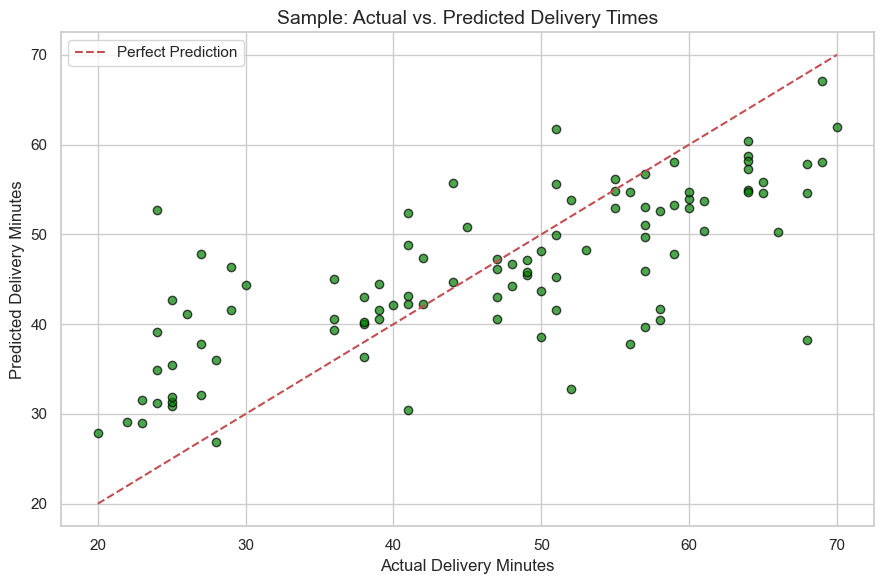

In [5]:
# view_predictions.py

import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Load the ML feature table
features = pd.read_csv("woeat_demo/gold/ml_delivery_features.csv")

# Drop rows where the target is missing
features = features.dropna(subset=["delivery_minutes"])


# Separate the features (X) and target (y)
# Our features: distance_km, driver_rating, weather_condition, and time_of_day
X = features[["distance_km", "driver_rating", "weather_condition", "time_of_day"]]
y_true = features["delivery_minutes"]

# Load the pre-trained model pipeline (assumed saved as "woeat_model_pipeline.pkl")
model_pipeline = joblib.load("woeat_model_pipeline.pkl")

# Generate predictions using the model
y_pred = model_pipeline.predict(X)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.1f} minutes")

sample = features.sample(100, random_state=1)
X_sample = sample[["distance_km", "driver_rating", "weather_condition", "time_of_day"]]
y_sample = sample["delivery_minutes"]
y_pred_sample = model_pipeline.predict(X_sample)

plt.figure(figsize=(9, 6))
plt.scatter(y_sample, y_pred_sample, alpha=0.7, color="green", edgecolors="black")
plt.plot(
    [y_sample.min(), y_sample.max()],
    [y_sample.min(), y_sample.max()],
    "r--",
    label="Perfect Prediction"
)
plt.xlabel("Actual Delivery Minutes", fontsize=12)
plt.ylabel("Predicted Delivery Minutes", fontsize=12)
plt.title("Sample: Actual vs. Predicted Delivery Times", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




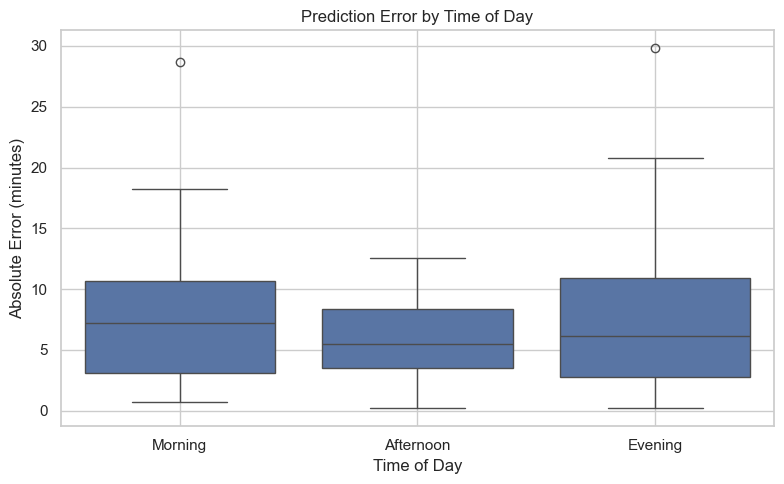

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate prediction error
sample["error"] = abs(y_sample - y_pred_sample)

# Create boxplot grouped by time_of_day
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=sample,
    x="time_of_day",
    y="error",
    order=["Morning", "Afternoon", "Evening"]
)
plt.title("Prediction Error by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Absolute Error (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()
